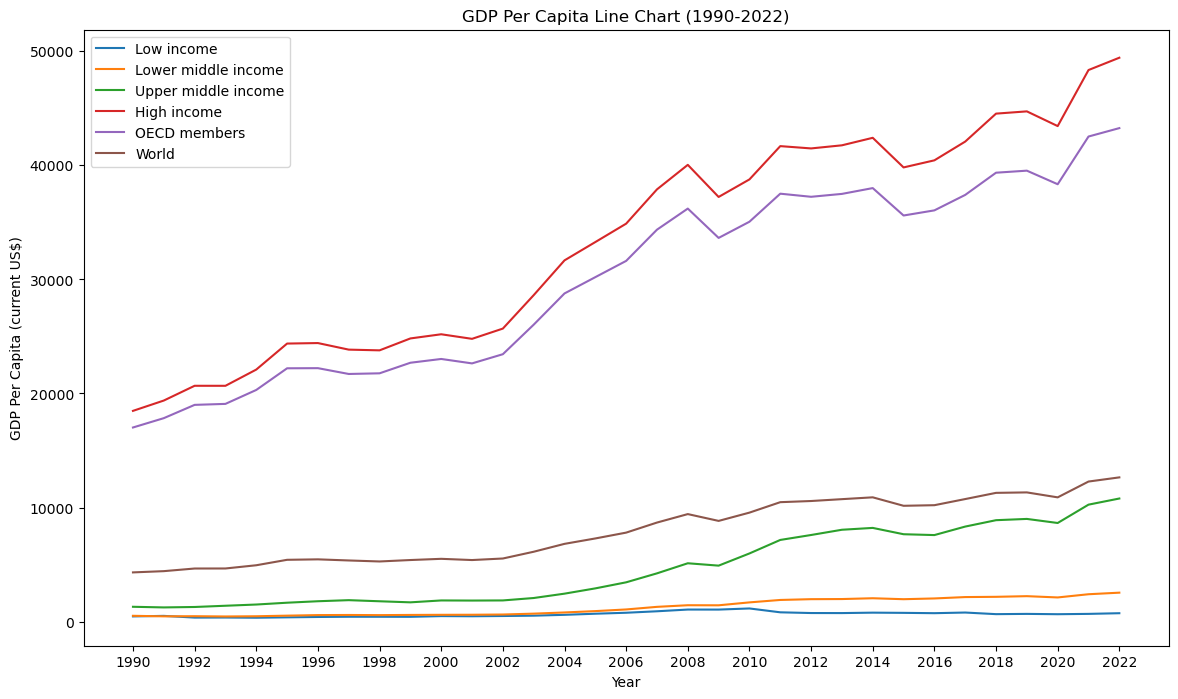

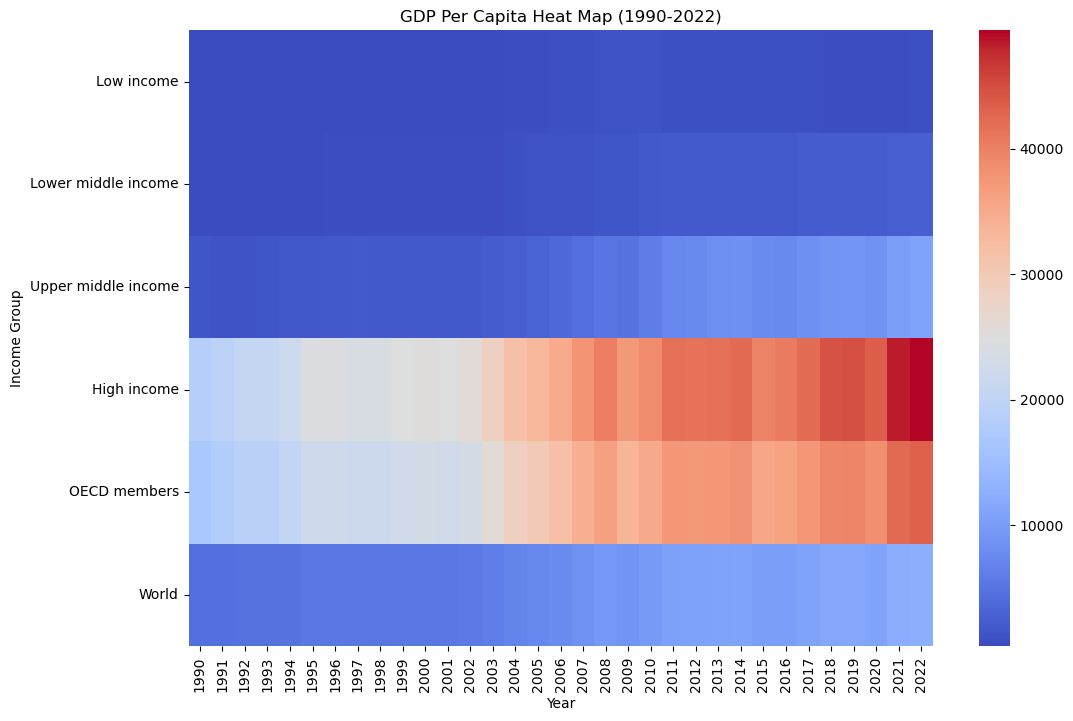

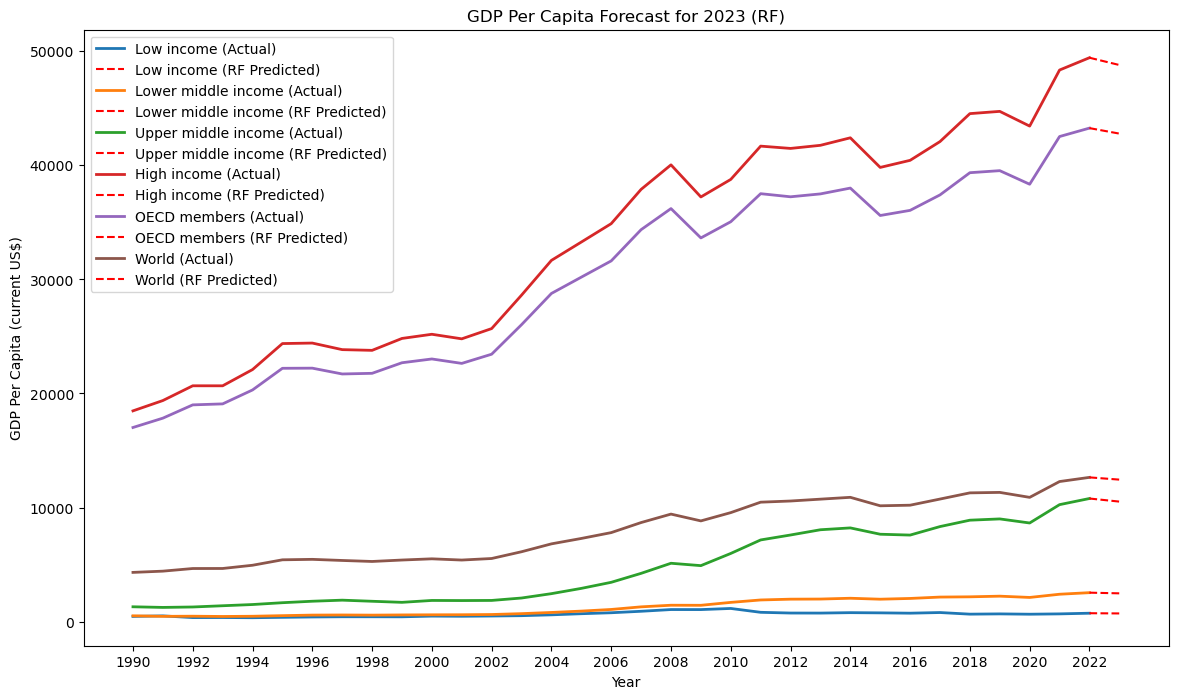

RF Predicted Value 2023
                     2023 Predicted  % Change
Low income               721.621923 -2.647230
Lower middle income     2482.951049 -2.330615
Upper middle income    10524.596060 -2.504284
High income            48792.638198 -1.290081
OECD members           42779.383725 -1.112601
World                  12450.877158 -1.554488


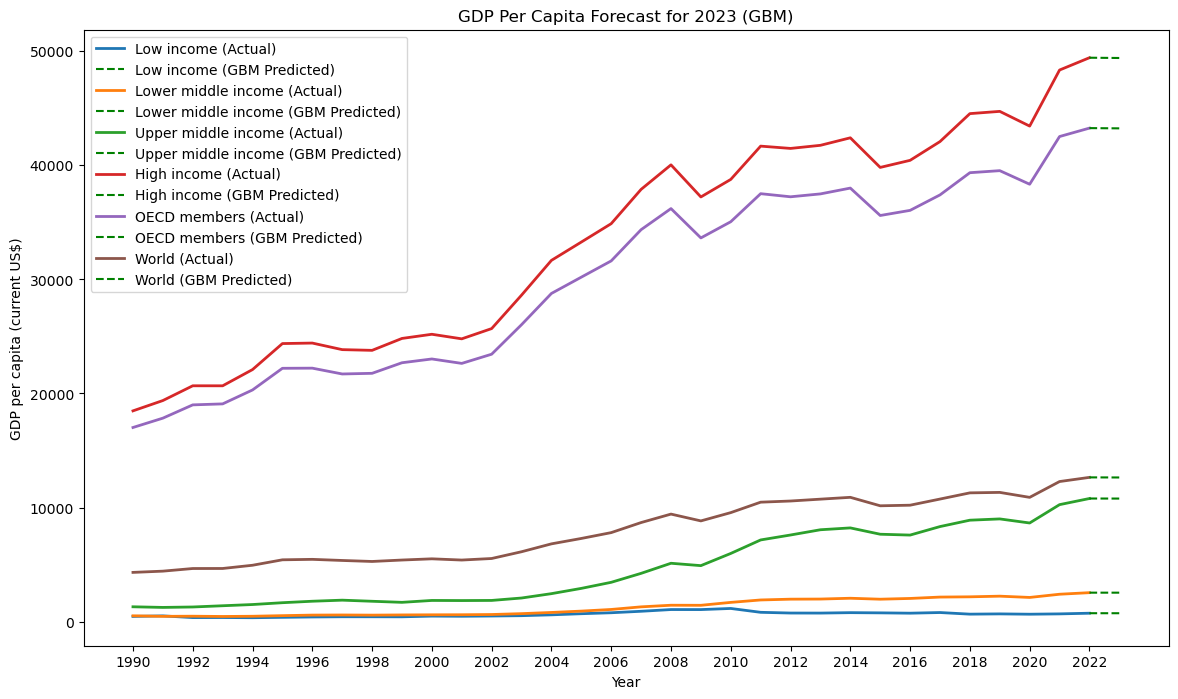

GBM Predicted Value 2023
                     2023 Predicted  % Change
Low income               739.818117 -0.192412
Lower middle income     2541.367605 -0.032741
Upper middle income    10789.780389 -0.047721
High income            49406.619743 -0.047966
OECD members           43239.262517 -0.049560
World                  12638.458776 -0.071334


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Load the data
data = pd.read_csv('CSV_GDPPC.csv', skiprows=4)

# Define the groups of interest
groups = ["Low income", "Lower middle income", "Upper middle income", "High income", "OECD members", "World"]

# Filter the data for these groups
data_filtered = data[data['Country Name'].isin(groups)]

# Define the years of interest
years = list(map(str, range(1990, 2023)))

# Function to calculate percentage change
def calc_percentage_change(new_val, old_val):
    return ((new_val - old_val) / old_val) * 100

# 1. Line Chart with actual value from 1990 to 2022 (Chart 5.1)
plt.figure(figsize=(14, 8))
for i, group in enumerate(groups):
    plt.plot(years, data_filtered[data_filtered['Country Name'] == group][years].values[0], label=group)
plt.xticks(years[::2])
plt.title('GDP Per Capita Line Chart (1990-2022)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (current US$)')
plt.legend()
plt.show()

# 2. Heat Map actual value from 1990 to 2022 (Chart 5.2)
plt.figure(figsize=(12, 8))
sns.heatmap(data_filtered.set_index('Country Name').loc[groups, years], annot=False, cmap="coolwarm")
plt.title('GDP Per Capita Heat Map (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Income Group')
plt.show()

# 3. RF Prediction Table and Line Chart for 2023
#(Chart 5.3 & 5.4 and Table 5.1 & 5.2)
rf_predictions_2023 = {}
rf_percent_changes_2023 = {}
plt.figure(figsize=(14, 8))
for i, group in enumerate(groups):
    gdp_data = data_filtered[data_filtered['Country Name'] == group][years].values[0]
    last_known_value = gdp_data[-1] if not np.isnan(gdp_data[-1]) else gdp_data[-2]
    gdp_data = pd.Series(gdp_data, index=pd.to_numeric(years)).dropna()
    X = gdp_data.index.values.reshape(-1, 1)
    y = gdp_data.values
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    prediction_2023 = rf_model.predict([[2023]])[0]
    rf_predictions_2023[group] = prediction_2023
    percent_change = calc_percentage_change(prediction_2023, last_known_value)
    rf_percent_changes_2023[group] = percent_change
    plt.plot(years, gdp_data.values, label=f"{group} (Actual)", linewidth=2)
    plt.plot(['2022', '2023'], [last_known_value, prediction_2023], 'r--', label=f"{group} (RF Predicted)")

plt.xticks(years[::2])
plt.title('GDP Per Capita Forecast for 2023 (RF)')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita (current US$)')
plt.legend()
plt.show()

# Display RF Prediction table for 2023
rf_predictions_2023_df = pd.DataFrame({
    '2023 Predicted': list(rf_predictions_2023.values()),
    '% Change': list(rf_percent_changes_2023.values())
}, index=list(rf_predictions_2023.keys()))
print("RF Predicted Value 2023")
print(rf_predictions_2023_df)

# 5. GBM Prediction Table and Line Chart for 2023
gbm_predictions_2023 = {}
gbm_percent_changes_2023 = {}
plt.figure(figsize=(14, 8))
for i, group in enumerate(groups):
    gdp_data = data_filtered[data_filtered['Country Name'] == group][years].values[0]
    last_known_value = gdp_data[-1] if not np.isnan(gdp_data[-1]) else gdp_data[-2]
    gdp_data = pd.Series(gdp_data, index=pd.to_numeric(years)).dropna()
    X = gdp_data.index.values.reshape(-1, 1)
    y = gdp_data.values
    gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbm_model.fit(X, y)
    prediction_2023 = gbm_model.predict([[2023]])[0]
    gbm_predictions_2023[group] = prediction_2023
    percent_change = calc_percentage_change(prediction_2023, last_known_value)
    gbm_percent_changes_2023[group] = percent_change
    plt.plot(years, gdp_data.values, label=f"{group} (Actual)", linewidth=2)
    plt.plot(['2022', '2023'], [last_known_value, prediction_2023], 'g--', label=f"{group} (GBM Predicted)")

plt.xticks(years[::2])
plt.title('GDP Per Capita Forecast for 2023 (GBM)')
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.legend()
plt.show()

# Display GBM Prediction table for 2023
gbm_predictions_2023_df = pd.DataFrame({
    '2023 Predicted': list(gbm_predictions_2023.values()),
    '% Change': list(gbm_percent_changes_2023.values())
}, index=list(gbm_predictions_2023.keys()))
print("GBM Predicted Value 2023")
print(gbm_predictions_2023_df)

# Python codes are available on GitHub at: https://github.com/BlockQuant18/SU-PHD-TM